(temperature)=
# Temperatur messen

## Lernziele für den Abschnitt *Temperatur messen*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Wichtige Temperatursensoren beschreiben</li>
        <li> mithilfe von Kennlinien, Formeln und Datenblättern </li>
        <li> um gewollte und störende Temperatureffekte bewerten zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Beispielmessung

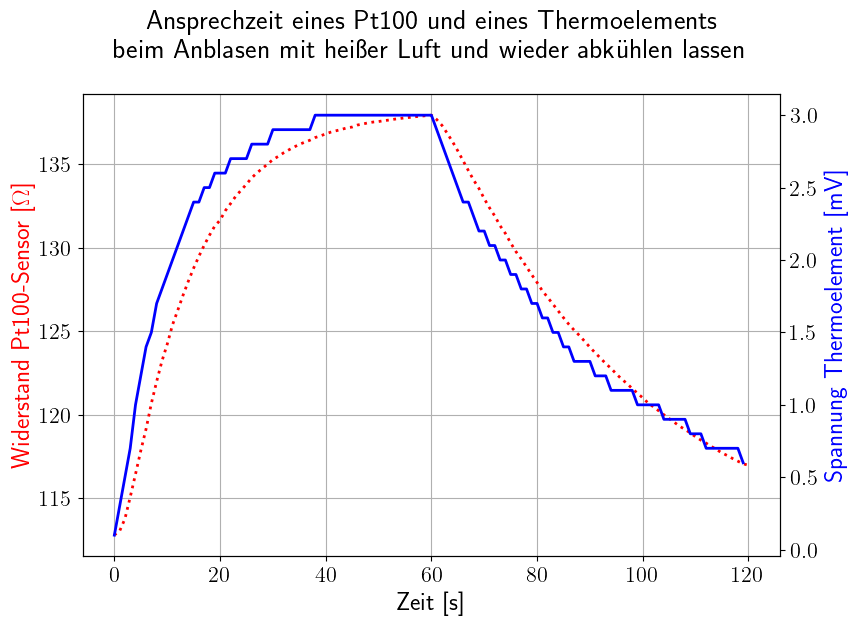

In [3]:
df=pd.read_csv('../data/PT100_3mm.csv', sep=';', header=6,usecols=('Messwert','Startzeit'), parse_dates=True,decimal=',',encoding='unicode_escape')
df=df.apply(lambda x: x.str.replace(',','.'))
df=df.stack().str.replace(',','.').unstack()
df['Startzeit']=pd.to_datetime(df['Startzeit'])
df['Messwert']=pd.to_numeric(df['Messwert'],errors='coerce')
dfzeit1=df['Startzeit'] -df['Startzeit'][0]
df2=pd.read_csv('../data/Thermo_15.csv',sep=';', #
    header=6,usecols=('Messwert','Startzeit'), #
    parse_dates=True,decimal=',',encoding='gbk')
df2=df2.apply(lambda x: x.str.replace(',','.'))
df2=df2.stack().str.replace(',','.').unstack()
df2['Startzeit']=pd.to_datetime(df2['Startzeit'])
df2['Messwert']=pd.to_numeric(df2['Messwert'],errors='coerce')
dfzeit2=df2['Startzeit'] -df2['Startzeit'][0]
fig,ax1=plt.subplots(figsize=(9,6))
ax1.set_title('Ansprechzeit eines Pt100 und eines Thermoelements \nbeim Anblasen mit heißer Luft und wieder abkühlen lassen'+"\n")
ax2=ax1.twinx()
lns1=ax1.plot(1e-9*dfzeit1,df['Messwert'],'r:',label='Pt100')
lns2=ax2.plot(1e-9*dfzeit2,1e3*df2['Messwert'],'b-',label='Thermoelement')
ax1.set_xlabel('Zeit [s]')
ax2.set_xlabel('Zeit [s]')
ax1.set_ylabel('Widerstand Pt100-Sensor [$\Omega$]', color='red')
ax2.set_ylabel('Spannung Thermoelement [mV]', color = 'blue')
ax1.grid()
plt.show()

**AUFGABE** Es handelt sich bei beiden Sensoren um mit Edelstahl ummantelte Stabsensoren der Länge 10 cm. Woraus ergeben sich Unterschiede im Messergebnis? Wie groß ist die Ansprechzeit und welcher Sensor ist geeignet, wenn die heiße Luft nur 60 Sekunden lang anliegt? Welcher Sensor ist genauer, wenn die heiße Luft dauerhaft anliegt? Woraus ergeben sich die Stufen in der Messkurve des Thermoelements? Was bedeutet das für die Temperaturmessung?

*Antwort*

## Überblick über Temperatursensoren

![Arten von Temperatursensoren](../img/tempsensors.png)

nach {cite:p}`hering_sensoren_2018-3`

rot markierte Sensoren: detailliertere Behandlung im Modul

## Temperaturwiderstände

### Metallwiderstände

In [4]:
IFrame("https://phet.colorado.edu/sims/html/resistance-in-a-wire/latest/resistance-in-a-wire_de.html", 400,300)

Temperaturabhängigkeit

\begin{equation}
R(T) = R(T_0)\cdot\left[\alpha T + \beta T^2 + \delta T^3 + ...\right]
\end{equation}

mit $\alpha(T)$, $\beta(T)$, $\delta(T)$ als Temperaturkoeffizienten

Linearisierung der Kennlinie meist zwischen 0°C und 100°C:

\begin{equation}
R(T=20^\circ\text{C}) = R_{20}
\end{equation}

\begin{equation}
R(T) = R_{20} (1 + \alpha(T-20^\circ\text{C}))=\rho_{20}\cdot\frac{l}{A}\cdot\left(1+\alpha(T-20^\circ\text{C})\right)
\end{equation}

mit dem spezifischen elektrischen Widerstand $\rho$, der Länge $l$ und dem Querschnitt $A$ des Leiters

| Messwiderstand | $\alpha$ im Mittel zwischen 0 und 100$^\circ$C | $R(-100^\circ\text{C})$ | $R(-60^\circ\text{C})$ | $R(0^\circ\text{C})$ | $R(100^\circ\text{C})$ | $R(180^\circ\text{C})$ | $R(200^\circ\text{C})$ |
|---|---|---|---|---|---|---|---|
| Pt100 | 0,00385 K$^{-1}$ | 60,25 $\Omega$ | | 100 $\Omega$ | 138,5 $\Omega$ | | 175,84 $\Omega$ |
| Ni100 | 0,00618 K$^{-1}$ | | 69,5 $\Omega$ | 100 $\Omega$ | 161,8 $\Omega$ | 223,2 $\Omega$ | |

Bauformen

| Leiterplattenmontage | Stabwiderstand typ. Dreileitertechnik, Fühlerlänge ca. 10 cm |
|---|---|
| <a title="Saure 18:37, 21. Nov. 2010 (CET), CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Messwiderstand_Pt_100.jpg"><img width="512" alt="Messwiderstand Pt 100" src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Messwiderstand_Pt_100.jpg"></a> | <a title="Dressel GmbH, Biebertal, CC BY-SA 3.0 DE &lt;https://creativecommons.org/licenses/by-sa/3.0/de/deed.en&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Dressel-Widerstandsthermometer.jpg"><img width="256" alt="Dressel-Widerstandsthermometer" src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Dressel-Widerstandsthermometer.jpg"></a> |

### Thermistoren

NTC (negative temperature coefficient): 

\begin{equation}
R(T) = R(T_0) \cdot \exp\left[B \cdot \left(\frac{1}{T}-\frac{1}{T_0}\right)\right]
\end{equation}

mit $T[\text{K}]$, Bezugstemperatur $T_0$ und $B = \text{const.}=f(\text{Material}, T)$

linearisiert: Temperaturbeiwert ca. 10fach der von Metallen

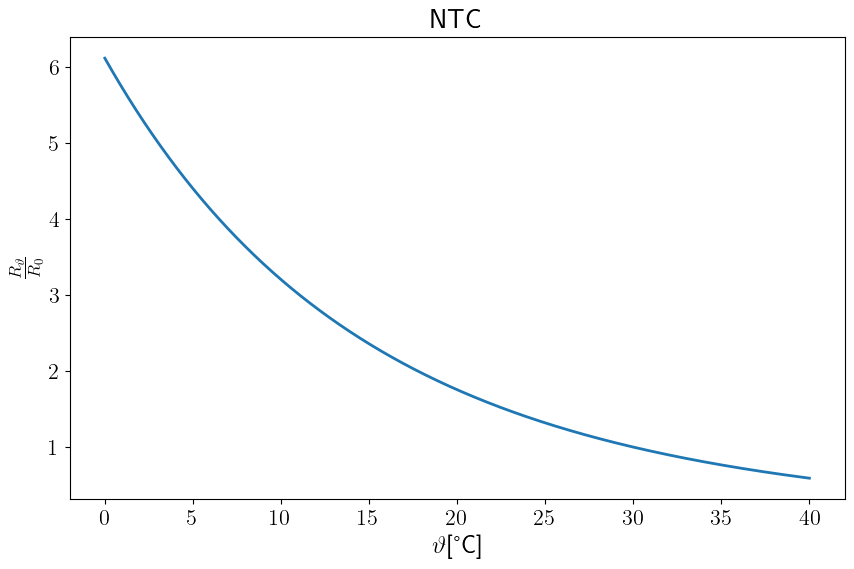

In [5]:
theta = np.linspace(0,40,1000)
T = 273.15 + theta
T0 = 273.15 + 30
B = 5000
Rnorm = np.exp(B*((1/T)-(1/T0)))
plt.plot(theta,Rnorm)
plt.xlabel(r'$\vartheta$[°C]')
plt.ylabel(r'$\frac{R_{\vartheta}}{R_0}$')
plt.title('NTC')
plt.show()

PTC (positive temperature coefficient):

- bei Nennansprechtemperatur (ca. 10 K großer Bereich) ca. 100facher Temperaturbeiwert im Vergleich zu Metallen
- üblicherweise nicht zur Temperaturmessung, sondern z. B. Überstromschutz für Motoren

![PTC](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/PTC-temperature-characteristic.png/557px-PTC-temperature-characteristic.png)

für unterschiedliche Nennansprechtemperaturen (NAT) $T_N$

typische Hauptkenngrößen {cite:p}`hering_sensoren_2018-3`, {cite:p}`parthier_messtechnik:_2016`:
- $R_{\text{min}} \geq 20\text{ }\Omega$
- $R_{\text{NAT}-5\text{ }K} \leq 550\text{ }\Omega$
- $R_{\text{NAT}+5\text{ }K} \geq 1300\text{ }\Omega$
- Nennansprechtemperatur (NAT) zwischen 60$^\circ$C und 180$^\circ$C (meist in Stufung von 10 K)

Funktionsprinzip {cite:p}`epcos_ag_ptc_2016`:
- polykristallines Material
- unterhalb der Curie Temperatur NTC Verhalten $R_{\text{Kornmaterial}}$
- oberhalb der Curie Temperatur $R_{\text{PTC}} = R_{\text{Kornmaterial}} + R_{\text{Korngrenze}}$, wobei $R_{\text{Korngrenze}} = f(T)$ mit sehr steilem Temperaturkoeffizient

**Achtung!** Anlegen von Spannungen verringert Widerstand, bis hin zum Durchbruch von Sperrschichten - Auswahl PTC mit geeigneter Spannungsfestigkeit je nach Anwendung! {cite:p}`niebuhr_physikalische_2011`

### Thermoelemente

Thermoelektrischer Effekt: Seebeck-Effekt: Verbindung aus zwei Metallen + Temperaturunterschied entlang Leiter = Thermospannung

<a title="Arne Hückelheim, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Thermoschema.svg"><img width="512" alt="Thermoschema" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Thermoschema.svg/512px-Thermoschema.svg.png"></a>

Temperatur $\to$ mehr Elektronen $\to$ Elektronen fließen in Richtung kalter Stelle (Menge abhängig vom Metall) $\to$ im Gleichgewicht messbare Spannung

Anschluss Messgerät: Messgerät benutzt wiederum anderes Metall an Anschlussleitung $\to$ zusätzliche (unbeabsichtigte) Thermoelemente

Kompensation {cite:p}`parthier_messtechnik:_2016`:
- $T_2$ (Vergleichsstelle) bekannt (z. B. konstante Labortemperatur oder Temperierung)
- Messung $T_2$ in Ausgleichsdose

Kontaktspannung zwischen zwei Metallen (unterschiedliche elektrochemische Niveaus) $\to$ Thermospannung $U_{\text{th}}=k_{\text{th}}$, $T$ bezogen auf Platin, z. B. Ni gegen Pt: $k_{\text{th}} = -19,4 .. - 12\text{ }\mu\text{V/K}$

In Messschaltung durch Messleitungen zwei weitere parasitäre Thermoelemente $U_{\text{thg}} = U_{\text{thM}} + U_{\text{th2}} + U_{\text{th3}}$

bei $T_M = T_2 = T$ ist $U_{\text{thg}} = 0 = k_{\text{thM}}\cdot T + k_{\text{th2}}\cdot T + k_{\text{th3}}\cdot T \to k_{\text{thM}} = -(k_{\text{th2}} + k_{\text{th3}})$

wenn Temperaturen verschieden: ...

\begin{equation}
U_{\text{thg}} = k_{\text{thM}}\cdot T_{\text{M}} + T_2 \cdot (k_{\text{th2}} + k_{\text{th3}})  = k_{\text{thM}} \cdot (T_{\text{M}} - T_2)
\end{equation}

![Thermoelement](../img/thermoelement.png)

| Metallpartner | Element | Kennbuchstabe | Temperaturbereich | Chemische Beständigkeit |
|---|---|---|---|---|
| Eisen-Konstantan | Fe-CuNi | J | -200 - 700°C | bis 400°C in oxidierender Atmosphäre, nicht gegen Schwefel und -verbindungen |
| Kupfer-Konstantan | Cu-CuNi | T | -250 - 300°C | Oxidierende und reduzierende Atmosphäre bis 400°C |
| Nickelchrom-Nickel | NiCr-Ni | K | -250 - 1000°C | |
| Nickelchrom-Konstantan | NiCr-CuNi | E | -250 -700°C | oxidationsbeständig |
| weitere siehe DIN IEC 584-1 und DIN 43710 | | | | |

typischerweise: Unedelmetallpaarungen haben größere Thermospannung $\to$ höhere Empfindlichkeit, aber auch schlechtere Korrosionsbeständigkeit {cite:p}`hering_sensoren_2018-3`, {cite:p}`parthier_messtechnik:_2016`

Ausgleichsleitungen: zur Überbrückung von Distanzen > Fühlerlänge (ca. 10 - 30 cm) zum Messgerät nur passende Ausgleichsleitungen einsetzen! 

Material Ausgleichsleitung (und -stecker!): 
- entweder Metall A + Metall B
- oder (aus Kostengründen) Metalle vergleichbarer Thermospannung $\to$ keine zusätzliche Spannung am Übergang

![Ausgleichsleitung](../img/ausgleichsleitung.png)

Auf wikipedia findet sich ein Beispielbild eines Thermoelements vom Typ K mit verpolungssicherem Stecker. Je nach Hersteller bestehen auch dessen Kontaktstifte und die Kupplungen aus hochreinem Thermomaterial {cite:p}`wikipedia_thermoelement_2022`

### Optische Temperatursensoren

- Effekt: Wärmestrahlung nach Stefan-Boltzmann-Gesetz $P_S = \varepsilon \sigma A (T_1^4 - T_2^4)$ mit Strahlungsleistung $P_S$, $\varepsilon$ Emissionsgrad der strahlenden Fläche, $\sigma = 5,671\cdot10^{-8}\text{ W/(m}^2\text{K}^4\text{)}$ Strahlungskonstante, $A$ strahlende Oberfläche eines Körpers, $T_1$ Temperatur des Strahlers, $T_2$ Temperatur der Umgebung (des Sensors)
- Sensor: fotoelektrischer Sensor mit Empfindlichkeit im Infrarot oder sich erhitzender Widerstand
- siehe späteres Kapitel "optische Sensoren"

## Übungsaufgaben

### Kennnlinie eines Widerstandsthermometers

Für ein Widerstandsthermometer ist die Temperatur- / Widerstands-Kennlinie und die Spannungs- / Widerstandskennlinie zu ermitteln und zu skizzieren. Zur Berechnung kann sich auf den linearen Zusammenhang zwischen Temperatur und Widerstandsänderung beschränkt werden. Es sind folgende Parameter der Messschaltung nach dem Zweileiterprinzip gegeben: $R_0 = 100\text{ }\Omega$, $\Delta T = 100\text{ }K$, $\alpha_{Pt} = 0,00385/\text{K}$, $T_0 =0^\circ\text{C}$, Messstrom der Zweileiterschaltung $I=\text{const.} = 10\text{ mA}$

*Lösung an der Tafel*

### Thermoelement Messspannungsbereich

Mit einem Thermoelement sollen Temperaturen von 0 .. 1200°C gemessen werden. Die Vergleichsstellentemperatur wird mit 50°C festgelegt. Als Thermopaar kommt Pt13Rh-Pt ($k_{\text{th}}= 10\text{ }\mu\text{V/K}$) zum Einsatz. Welcher Messspannungsbereich ergibt sich?

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```